# <img style="float: left; padding-right: 10px; width: 45px" src="style/iacs.png"> CS-109A Introduction to Data Science: 

## Homework 2: Linear and k-NN Regression


**Harvard University**<br/>
**Summer 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">


### INSTRUCTIONS

- To submit your assignment follow the instructions given in Classroom.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

Names of people you have worked with goes here: 



## Student: Lucas Machado Moschen 

<hr style="height:2pt">

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

<div class="theme"> Main Theme: Predicting Taxi Pickups in NYC </div>

In this homework, we will explore k-nearest neighbor and linear regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in the file `dataset_1.csv`.  You will need to separate it into training and test sets. The first column contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded in NYC during Jan 2015.

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric.

<div class="exercise"> <b> Question 1 [10 pts]</b> </div>

**1.1**. Use pandas to load the dataset from the csv file `dataset_1.csv` into a pandas data frame.  Use the `train_test_split` method from `sklearn` with a `random_state` of 42 and a `test_size` of 0.2 to split the dataset into training and test sets.  Store your train set dataframe in the variable `train_data`.  Store your test set dataframe in the variable `test_data`.


**1.2**. Generate a scatter plot of the training data points with well-chosen labels on the x and y axes. The time of the day should be on the x-axis and the number of taxi pickups on the y-axis.  Make sure to title your plot.

**1.3**. Does the pattern of taxi pickups make intuitive sense to you? 


### Answers

**1.1**

In [2]:
## Code here
taxi_pickups = pd.read_csv("data/dataset_1.csv")
train_data, test_data = train_test_split(taxi_pickups, random_state = 42, test_size = 0.2)

**1.2**

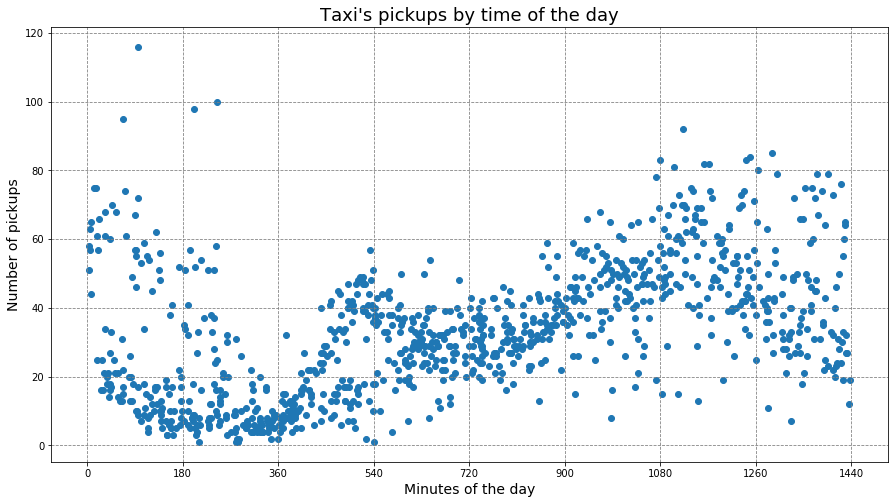

In [3]:
## Code for your plot here
plt.figure(figsize=(15,8))
plt.scatter(train_data.TimeMin, train_data.PickupCount)

plt.title("Taxi's pickups by time of the day", fontsize = 18)
plt.xlabel("Minutes of the day", fontsize = 14)
plt.ylabel("Number of pickups", fontsize = 14)
plt.grid(b = True, linestyle = '--', color = 'grey', which = 'major')
plt.xticks(ticks=range(0, 24*60 + 1, 180))
plt.show()

**1.3**

**Does the pattern of taxi pickups make intuitive sense to you?**

In certain way, yes. In the first three hours, people like to take takis to go home after har work and parties. What is stange for me is that in the morning, there are less taki's pickups and it increases during the day with the pick after 6 pm. So, ok! Thats fine for me because of the (again) work time.  I perceived the problem in this view and tried to do something a little bit different. I made below a bar plot by 3 hours. Now tjats make more sense! The minimum is between $[180, 360) = [3, 6)$, what makes a lot of sense! The second minimum is in the dawn, what makes sense again, because of the paties and etc. 

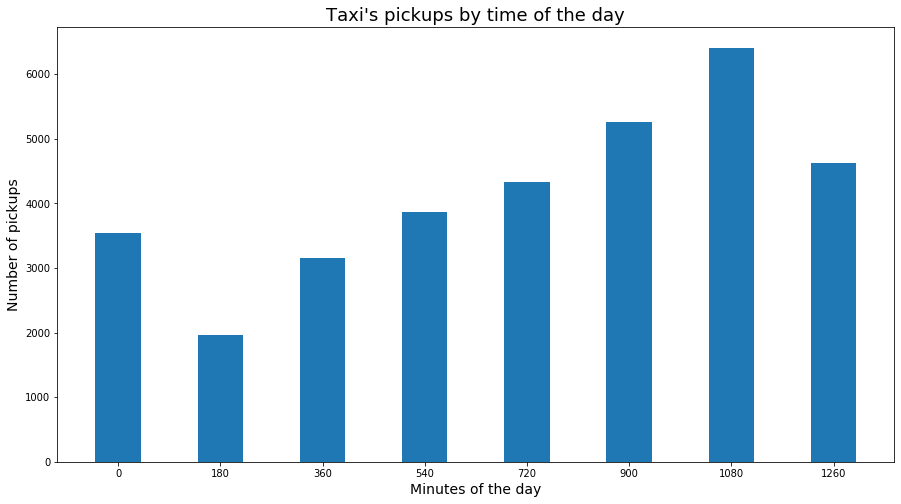

In [4]:
copy = train_data[['TimeMin', 'PickupCount']]
hour_round = lambda x: int(x/180)*180
copy['Third'] = copy.TimeMin.apply(hour_round)
copy = copy.groupby('Third').sum()['PickupCount']
copy

plt.figure(figsize=(15,8))
plt.bar(copy.index, np.array(copy), width=80)

plt.title("Taxi's pickups by time of the day", fontsize = 18)
plt.xlabel("Minutes of the day", fontsize = 14)
plt.ylabel("Number of pickups", fontsize = 14)
plt.xticks(copy.index)
plt.show()

<div class="exercise"> <b>Question 2 [20 pts]</b> </div>

In lecture we've seen k-Nearest Neighbors (k-NN) Regression, a non-parametric regression technique.  In the following problems please use built-in functionality from `sklearn` to run k-NN Regression. 


**2.1**. Choose `TimeMin` as your predictor variable (aka, feature) and `PickupCount` as your response variable.  Create a dictionary of `KNeighborsRegressor` objects and call it `KNNModels`.  Let the key for your `KNNmodels` dictionary be the value of $k$ and the value be the corresponding `KNeighborsRegressor` object. For $k \in \{1, 10, 75, 250, 500, 750, 1000\}$, fit k-NN regressor models on the training set (`train_data`). 

**2.2**.  For each $k$ on the training set, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` with a scatter plot of predicted `PickupCount` vs `TimeMin`.  Do the same for the test set.  You should have one figure with 2 x 7 total subplots; for each $k$ the figure should have two subplots, one subplot for the training set and one for the test set. 

**Hints**:
1. In each subplot, use two different colors and/or markers to distinguish k-NN regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)


**2.3**. Report the $R^2$ score for the fitted models on both the training and test sets for each $k$.

**Hints**:
1. Reporting the $R^2$ values in tabular form is encouraged.
2. You should order your reported $R^2$ values by $k$.

**2.4**. Plot the $R^2$ values from the model on the training and test set as a function of $k$ on the same figure.  

**Hints**:
1. Again, the figure must have axis labels and a legend.
2. Differentiate $R^2$ visualization on the training and test set by color and/or marker.
3. Make sure the $k$ values are sorted before making your plot.

**2.5**. Discuss the results:

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
2. What does an $R^2$ score of $0$ mean?  
3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?
4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  
5. How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?
6. What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?

### Answers

**2.1**

In [5]:
## Code here
KNNModels = dict(zip((1, 10, 75, 250, 500, 750, 1000), [None]*7))
for k in KNNModels.keys():
    model = KNeighborsRegressor(n_neighbors=k)
    KNNModels[k] = model.fit(train_data[['TimeMin']], train_data['PickupCount'])
KNNModels

{1: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform'),
 10: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform'),
 75: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=75, p=2,
                     weights='uniform'),
 250: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=250, p=2,
                     weights='uniform'),
 500: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=500, p=2,
                     weights='uniform'),
 750: KNeighborsRegressor(algorit

**2.2**

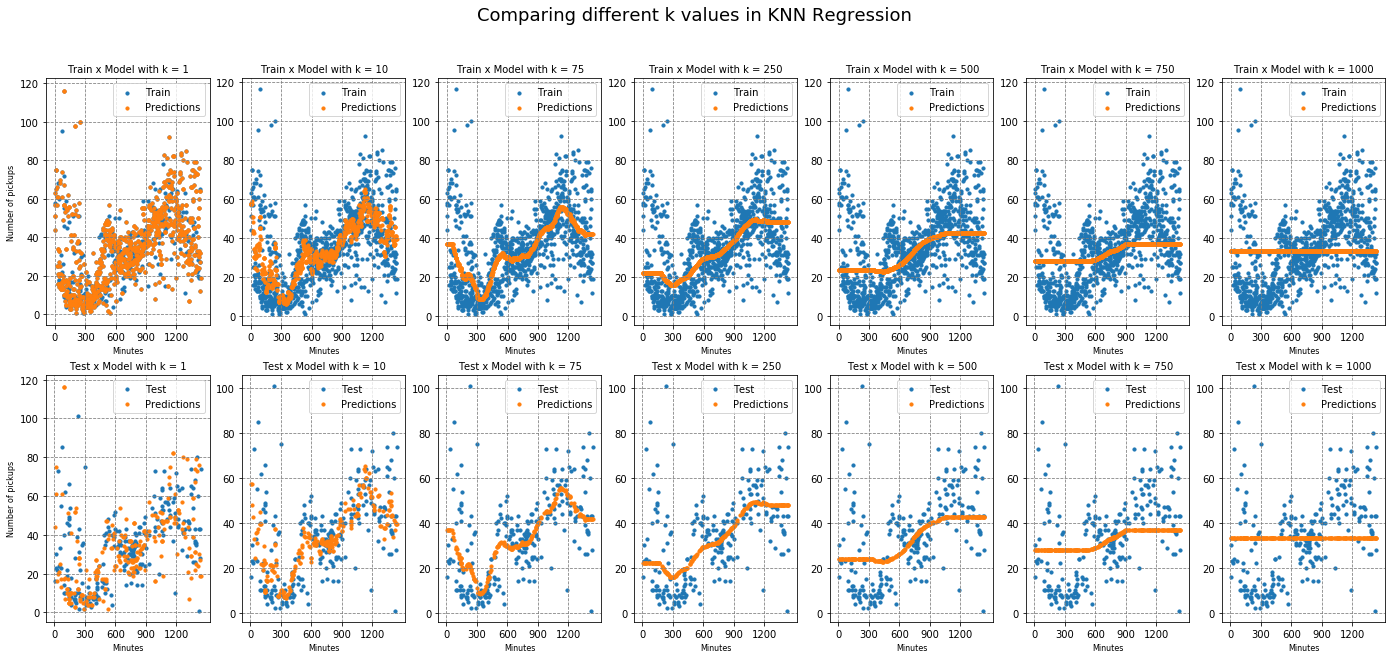

In [6]:
## Code for your plot here
fig, ax = plt.subplots(2,7, figsize = (24, 10))
fig.suptitle("Comparing different k values in KNN Regression", fontsize = 18)

s = 10 #point size

for index, k in enumerate(KNNModels.keys()):
    predict_train = KNNModels[k].predict(train_data[['TimeMin']])
    predict_test = KNNModels[k].predict(test_data[['TimeMin']])

    ax[0][index].scatter(train_data.TimeMin, train_data.PickupCount, label = 'Train', s = s)
    ax[0][index].scatter(train_data.TimeMin, predict_train, label = 'Predictions', s = s)
    ax[1][index].scatter(test_data.TimeMin, test_data.PickupCount, label = 'Test', s = s)
    ax[1][index].scatter(test_data.TimeMin, predict_test, label = 'Predictions', s  = s)

    ax[0][index].legend()
    ax[1][index].legend()
    
    ax[0][index].set_title("Train x Model with k = {}".format(k), fontsize = 10)
    ax[1][index].set_title("Test x Model with k = {}".format(k), fontsize = 10)
    ax[0][index].set_xlabel("Minutes", fontsize = 8)
    ax[1][index].set_xlabel("Minutes", fontsize = 8)
    ax[0][index].grid(b = True, linestyle = '--', color = 'grey', which = 'major')
    ax[1][index].grid(b = True, linestyle = '--', color = 'grey', which = 'major')
    ax[0][index].set_xticks(ticks=range(0, 24*60 + 1, 300))
    ax[1][index].set_xticks(ticks=range(0, 24*60 + 1, 300))

ax[0][0].set_ylabel("Number of pickups", fontsize = 8)
ax[1][0].set_ylabel("Number of pickups", fontsize = 8)

plt.show()

**2.3**

In [7]:
## Code here
train = []
test = []
for k in KNNModels.keys():
    score_train = KNNModels[k].score(train_data[['TimeMin']], train_data['PickupCount'])
    score_test = KNNModels[k].score(test_data[['TimeMin']], test_data['PickupCount'])
    train.append(score_train)
    test.append(score_test)
r2_score_model = pd.DataFrame(data = {'k': list(KNNModels.keys()), 'train': train, 'test': test})
r2_score_model = r2_score_model.set_index('k')
r2_score_model

,train,test
k,,
1,0.712336,-0.418932
10,0.509825,0.272068
75,0.445392,0.390310
250,0.355314,0.340341
500,0.290327,0.270321
750,0.179434,0.164909
1000,0.000000,-0.000384


**2.4**

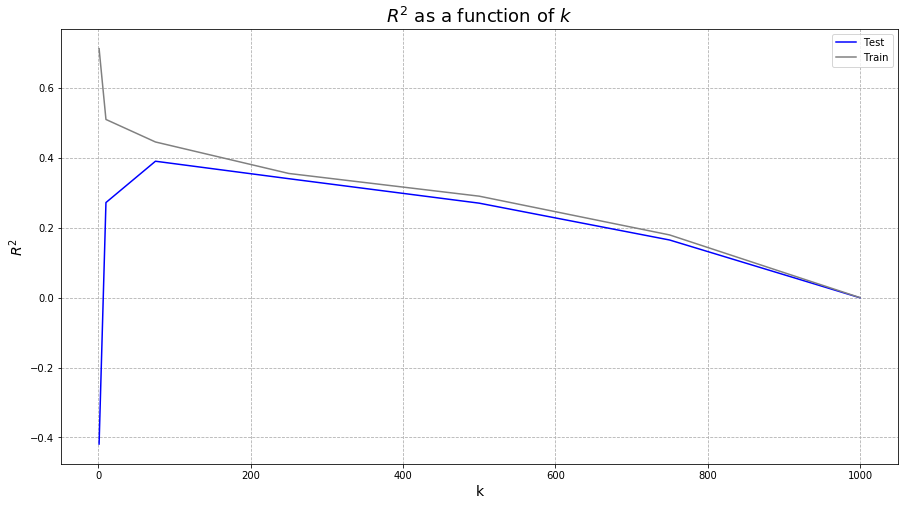

In [8]:
## Code for your plot here
plt.figure(figsize = (15,8))
plt.plot(r2_score_model.index, r2_score_model.test, label = 'Test', color = 'blue')
plt.plot(r2_score_model.index, r2_score_model.train, label = 'Train', color = 'grey')

plt.title(f'$R^2$ as a function of $k$', fontsize = 18)
plt.grid(b = True, linestyle = '--')
plt.xlabel('k', fontsize = 14)
plt.ylabel(f'$R^2$', fontsize = 14)
plt.legend()
plt.show()

**2.5**

**Discuss the results**


1. *If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?*  

        When $k = n$, to predict a value for each x label, all points will be its neighbor. This works for all points. So, every point will represent the mean value as we perceived in $k = 1000$.
    
2. *What does an $R^2$ score of $0$ mean?*

        It means the sum of the squared residuals of the model are equal to the squared residuals if the model was the mean. So, if $R^2 = 0$, these squared residuals are equal. We can say that, in mean, the model is similar to the mean model. Or in better words, the model is nothing better than the mean model. 

3. *What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?*

        This would mean the model is worse than the mean value, because the squared residuals are bigger than the other one. By the Okan's Knife, the mean should, in general, be the chosen between those models. Yes, when k = 1 and k = 1000, the score of the testing data was negative. 
       
4. *Do the training and test $R^2$ plots exhibit different trends?  Describe.*  

        When $k$ is small, yes. The training plot has only a decreasing behaviour, while the testing data has an increasing, and after decresing. So there is to interval. In the first one, the trens are opposit, and in the second, equal. This makes sanse, cause when $k$ is small, only some near points interfer in the model, so the score in train data is better, because the real data will have more influence, while $k$ gets bigger, it decreases. 
        
5. *How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?*

        When $k$ is small, the training data has the best $R^2$ score and as $k$ gets bigger, the score decreases. The test has an increasing when $k$ increases until a peak. After, it decreases, as $k$ increases. The fitted model change and it has a peak, the best, and after, it gets worse and worse.
    
6. *What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?*
    
        The best value of $k$ acording to $R^2$ score is 75, with training set $R^2$ value 0.445392 and testing set 0.390310. 
    

<div class="exercise"> <b> Question 3  [20 pts] </b></div>

We next consider simple linear regression for the same train-test data sets, which we know from lecture is a parametric approach for regression that assumes that the response variable has a linear relationship with the predictor.  Use the `statsmodels` module for Linear Regression. This module has built-in functions to summarize the results of regression and to compute confidence intervals for estimated regression parameters.  

**3.1**. Again choose `TimeMin` as your predictor variable and `PickupCount` as your response variable.  Create a `OLS` class instance and use it to fit a Linear Regression model on the training set (`train_data`).  Store your fitted model in the variable `OLSModel`.

**3.2**. Re-create your plot from 2.2 using the predictions from `OLSModel` on the training and test set. You should have one figure with two subplots, one subplot for the training set and one for the test set.

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)


**3.3**. Report the $R^2$ score for the fitted model on both the training and test sets.  You may notice something peculiar about how they compare.

**3.4**. Report the slope and intercept values for the fitted linear model.  

**3.5**. Report the $95\%$ confidence interval for the slope and intercept.

**3.6**. Create a scatter plot of the residuals ($e = y - \hat{y}$) of the linear regression model on the training set as a function of the predictor variable (i.e. `TimeMin`). Place on your plot a horizontal line denoting the constant zero residual.  

**3.7**. Discuss the results:

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?
2. What does the sign of the slope of the fitted linear model convey about the data?  
3. Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?  
4. Do you expect a $99\%$ confidence interval for the slope and intercept to be tighter or looser than the $95\%$ confidence intervals? Briefly explain your answer.  
5. Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.

### Answers

**3.1**

In [9]:
## Code here
x_train = sm.add_constant(train_data[['TimeMin']])
x_test  = sm.add_constant(test_data[['TimeMin']])
y_train = train_data['PickupCount']
y_test  = test_data['PickupCount']
OLSModelIns = OLS(y_train, x_train)
OLSModel = OLSModelIns.fit()

**3.2**

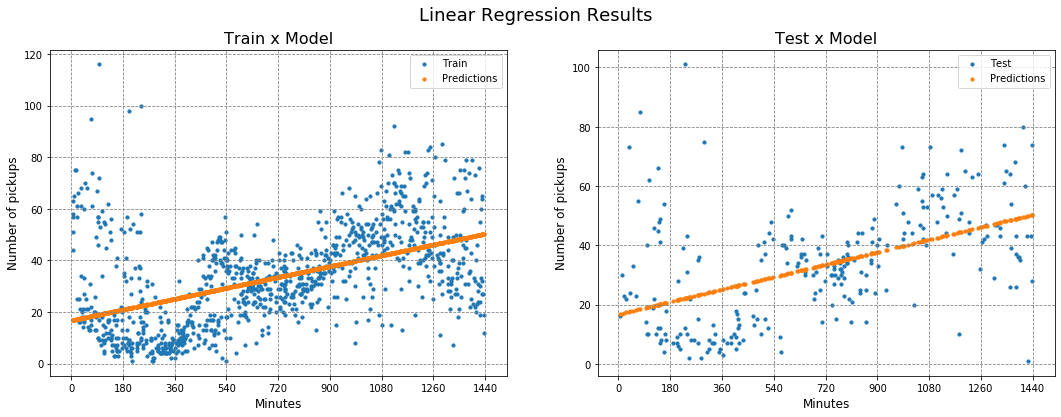

In [10]:
## Code for your plot here

fig, ax = plt.subplots(1,2, figsize = (18, 6))
fig.suptitle("Linear Regression Results", fontsize = 18)

s = 10 #point size

predict_train =OLSModel.predict(x_train)
predict_test = OLSModel.predict(x_test)

ax[0].scatter(train_data.TimeMin, train_data.PickupCount, label = 'Train', s = s)
ax[0].scatter(train_data.TimeMin, predict_train, label = 'Predictions', s = s)
ax[1].scatter(test_data.TimeMin, test_data.PickupCount, label = 'Test', s = s)
ax[1].scatter(test_data.TimeMin, predict_test, label = 'Predictions', s  = s)

ax[0].legend()
ax[1].legend()

ax[0].set_title("Train x Model", fontsize = 16)
ax[1].set_title("Test x Model", fontsize = 16)
ax[0].set_xlabel("Minutes", fontsize = 12)
ax[1].set_xlabel("Minutes", fontsize = 12)
ax[0].set_ylabel("Number of pickups", fontsize = 12)
ax[1].set_ylabel("Number of pickups", fontsize = 12)
ax[0].grid(b = True, linestyle = '--', color = 'grey', which = 'major')
ax[1].grid(b = True, linestyle = '--', color = 'grey', which = 'major')
ax[0].set_xticks(ticks=range(0, 24*60 + 1, 180))
ax[1].set_xticks(ticks=range(0, 24*60 + 1, 180))

plt.show()

**3.3**

In [11]:
## Code here
print("R^2 Score for Linear Regression (Training):", r2_score(y_train, OLSModel.predict(x_train)))
print("R^2 Score for Linear Regression (Testing) :", r2_score(y_test, OLSModel.predict(x_test)))

R^2 Score for Linear Regression (Training): 0.2430260353189334
R^2 Score for Linear Regression (Testing) : 0.240661535615741


**3.4**

In [12]:
## Code here
OLSModel.params.rename(index = {'const': 'intercept', 'TimeMin': 'slope'})

intercept    16.750601
slope         0.023335
dtype: float64

**3.5**

In [13]:
## Code here
alpha = 0.05
intervals = OLSModel.conf_int(alpha=alpha)

intervals = intervals.rename(columns={0:100*alpha/2,1:100-100*alpha/2}, index = {'const': 'intercept', 'TimeMin': 'slope'})
intervals

,2.5,97.5
intercept,14.675141,18.826062
slope,0.020777,0.025893


**3.6**

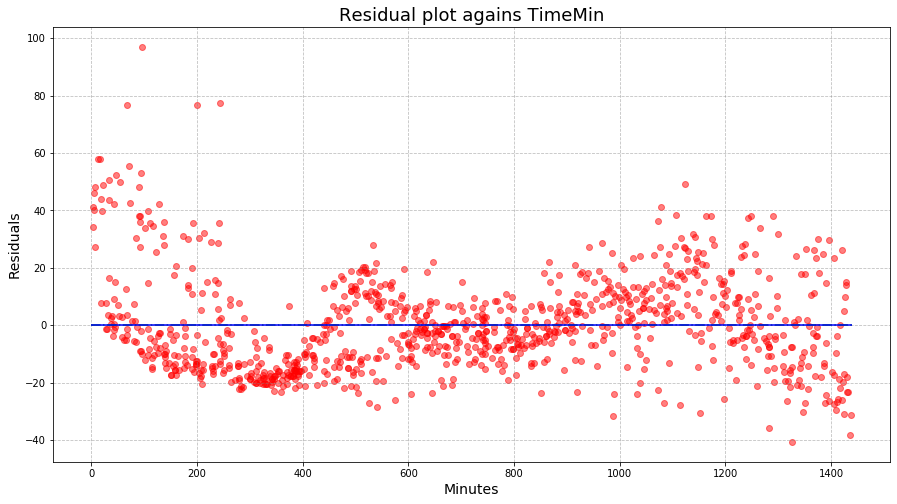

In [14]:
## Code here
residuals = y_train - OLSModel.predict(x_train)
plt.figure(figsize = (15,8))

plt.scatter(x_train['TimeMin'], residuals, color = 'red', alpha = 0.5)
plt.hlines(y = np.mean(residuals), xmin = 0, xmax = 24*60, color = 'green', linestyles="-.")
plt.hlines(y = 0, xmin = 0, xmax = 24*60, color = 'blue')

plt.title('Residual plot agains TimeMin', fontsize = 18)
plt.xlabel('Minutes', fontsize = 14)
plt.ylabel('Residuals', fontsize = 14)

plt.grid(b = True, color = 'grey', linestyle = '--', alpha = 0.5)

plt.show()

**3.7**

**Discuss the results**

1. *How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?*

        Pretty worse. It was 0.4 in kNN Regression agains 0.25 in Linear Regression, approx. 

2. *What does the sign of the slope of the fitted linear model convey about the data?* 

        The positive sign convey that there is a positive correlation between these variables. In other words, if the day gets later, the Pickup Counts increase. 

3. *Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?*  
    
        Yes, because the interval is really small. If we consider the unity in hour, the difference between the upper and lower bounds are $0.005\times60 = 0.3$, what seems to be small. The same with the intercept. 

4. *Do you expect a $99\%$ confidence interval for the slope and intercept to be tighter or looser than the $95\%$ confidence intervals? Briefly explain your answer.*  

        I expect a looser confidence interval, cause I need a bigger interval to cover a bigger area. More intercept and slope values can happen in "parallel universes".  

5. *Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.*

        I think it's not the case. There is a small correlation between those variables, but it's not so clear and in the begining the errors were much bigger. SO this assumption was not correct. (Some places the error was almos 100!) But the mean residuals was 0. This seems good!

<div class="exercise">  <b> Question 4 [20 pts]: Roll Up Your Sleeves Show Some Class </b> </div>

We've seen Simple Linear Regression in action and we hope that you're convinced it works.  In lecture we've thought about the mathematical basis for Simple Linear Regression.  There's no reason that we can't take advantage of our knowledge to create our own implementation of Simple Linear Regression.  We'll provide a bit of a boost by giving you some basic infrastructure to use.  In the last problem, you should have heavily taken advantage of the `statsmodels` module.  In this problem we're going to build our own machinery for creating Linear Regression models and in doing so we'll follow the `statsmodels` API pretty closely.  Because we're following the `statmodels` API, we'll need to use python classes to create our implementation.  If you're not familiar with python classes don't be alarmed.  Just implement the requested functions/methods in the CS109OLS class that we've given you below and everything should just work.  If you have any questions, ask the teaching staff.

**4.1**. Implement the `fit` and `predict` methods in the CS109OLS class we've given you below as well as the `CS109r2score` function that we've provided outside the class.

**Hints**:

1. `fit` should take the provided numpy arrays `endog` and `exog` and use the normal equations to calculate the optimal linear regression coefficients.  Store those coefficients in self.params
2. In `fit` you'll need to calculate an inverse.  Use np.linalg.pinv
3. `predict` should use the numpy array stored in self.exog and calculate an np.array of predicted values.
4. `CS109r2score` should take the true values of the response variable `y_true` and the predicted values of the response variable `y_pred` and calculate and return the $R^2$ score. 
5.  To replicate the statsmodel API your code should be able to be called as follows:
    ```python
    mymodel = CS109OLS(y_data, augmented_x_data)
    mymodel.fit()
    predictions = mymodel.predict()
    R2score = CS109r2score(true_values, predictions)
    ```

**4.2**. As in 3.1 create a `CS109OLS` class instance and  fit a Linear Regression model on the training set (`train_data`).  Store your model in the variable `CS109OLSModel`.  Remember that as with sm.OLS your class should assume you want to fit an intercept as part of your linear model (so you may need to add a constant column to your predictors).

**4.3**  As in 3.2 Overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` on the training set with a scatter plot of `PickupCount` vs predictions of `TimeMin` from your `CS109OLSModel` Linear Regression model on the training set.  Do the same for the test set.  You should have one figure with two subplots, one subplot for the training set and one for the test set.  How does your figure compare to that in 3.2?

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)

**4.4**. As in 3.3, report the $R^2$ score for the fitted model on both the training and test sets using your `CS109OLSModel`.  Make sure to use the `CS109r2score` that you created.  How do the results compare to the the scores in 3.3?

**4.5**. as in 3.4, report the slope and intercept values for the fitted linear model your `CS109OLSModel`.   How do the results compare to the the values in 3.4?




### Answers

**4.1**

In [15]:
class CS109OLS(object):
    
    def __init__(self, endog = [], exog = []):
        
        ## Make sure you initialize self.params
        self.params = []
              
        ## store exog and endog in instance variables
        self.endog = np.array(endog)
        self.exog = np.array(exog)
  
                    
    def fit(self):
        
        #################
        # Your Code below
        #################
        
        # Using the Linear Algebra approach

        X = np.hstack([self.exog, np.array([[1]]*self.exog.shape[0])])
        Y = self.endog.reshape((len(self.endog), 1))
        self.params = np.linalg.pinv(np.dot(X.T, X))
        self.params = np.dot(self.params, X.T)
        self.params = np.dot(self.params, Y)

        return self
            
    def predict(self, x = []):
        
        # check if the linear regression coefficients have been calculated
        if not np.array(self.params).size:
            raise(Exception("fit() has not been called on OLS Model!"))
        if x is self.predict.__defaults__[0]:
            x = self.exog
        else:
            x = np.array(x)

        #################
        # Your Code below
        #################
        
        predicted = self.params[0][0]*x + self.params[1][0]*np.array([[1]]*len(x))
        return predicted.reshape((1, len(predicted)))               
        
def CS109r2score(y_true, y_pred):
    
    #################
    # Your Code below
    #################
    
    # y_true should be your actual y data (endogenous data)
    # y_pred should be the corresponding predictions from your model
    
    # calculate the r^2 score an return it
    yhat = np.array(y_pred)
    y = np.array(y_true)
    mean = np.array([y.mean()]*len(y))
    r2 = 1 - np.sum((yhat - y)**2)/np.sum((mean - y)**2) 

    return r2

**4.2**

In [16]:
## Code here
CS109OLSModel = CS109OLS(train_data['PickupCount'], train_data[['TimeMin']])
CS109OLSModel.fit()
predictions = CS109OLSModel.predict()

**4.3**

The image is very similar to 3.2


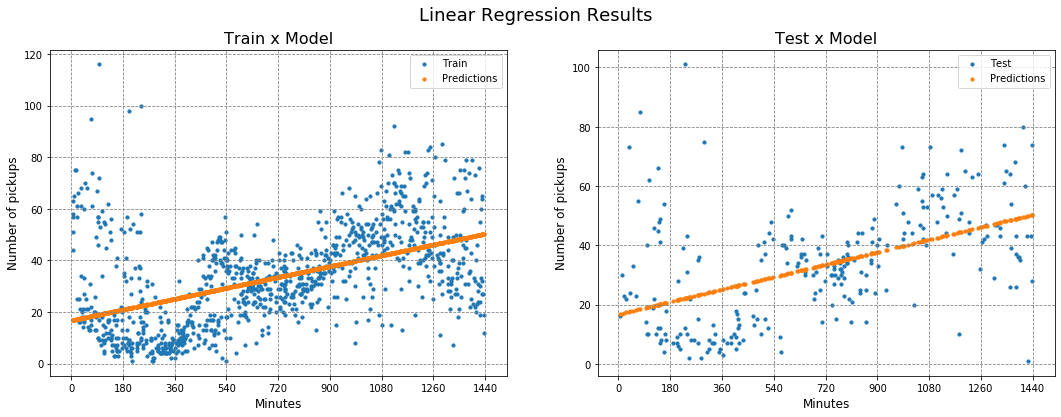

In [17]:
## Code for your plot here

fig, ax = plt.subplots(1,2, figsize = (18, 6))
fig.suptitle("Linear Regression Results", fontsize = 18)

s = 10 #point size

predict_train = CS109OLSModel.predict()
predict_test = CS109OLSModel.predict(x = test_data[['TimeMin']])

ax[0].scatter(train_data.TimeMin, train_data.PickupCount, label = 'Train', s = s)
ax[0].scatter(train_data.TimeMin, predict_train, label = 'Predictions', s = s)
ax[1].scatter(test_data.TimeMin, test_data.PickupCount, label = 'Test', s = s)
ax[1].scatter(test_data.TimeMin, predict_test, label = 'Predictions', s  = s)

ax[0].legend()
ax[1].legend()

ax[0].set_title("Train x Model", fontsize = 16)
ax[1].set_title("Test x Model", fontsize = 16)
ax[0].set_xlabel("Minutes", fontsize = 12)
ax[1].set_xlabel("Minutes", fontsize = 12)
ax[0].set_ylabel("Number of pickups", fontsize = 12)
ax[1].set_ylabel("Number of pickups", fontsize = 12)
ax[0].grid(b = True, linestyle = '--', color = 'grey', which = 'major')
ax[1].grid(b = True, linestyle = '--', color = 'grey', which = 'major')
ax[0].set_xticks(ticks=range(0, 24*60 + 1, 180))
ax[1].set_xticks(ticks=range(0, 24*60 + 1, 180))

print("The image is very similar to 3.2")
plt.show()

**4.4**

In [18]:
## Code here
print("R^2 Score for Linear Regression (Training):", CS109r2score(train_data['PickupCount'], CS109OLSModel.predict()))
print("R^2 Score for Linear Regression (Testing) :", CS109r2score(test_data['PickupCount'], CS109OLSModel.predict(test_data[['TimeMin']])))
print("The results are almost equal")

R^2 Score for Linear Regression (Training): 0.2430260353189334
R^2 Score for Linear Regression (Testing) : 0.24066153561574088
The results are almost equal


**4.5**

In [19]:
## Code here
params = pd.Series({'slope': CS109OLSModel.params[0][0], 'intercept': CS109OLSModel.params[1][0]})
display(params)
print("The results are almost equal.")

slope         0.023335
intercept    16.750601
dtype: float64

The results are almost equal.


<div class="exercise"><b> Question 5 </b></div>.

You may recall from lectures that OLS Linear Regression can be susceptible to outliers in the data.  We're going to look at a dataset that includes some outliers and get a sense for how that affects modeling data with Linear Regression.


**5.1**. We've provided you with two files `outliers_train.csv` and `outliers_test.csv` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data?

**5.2**. Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create a Linear Regression model on the training set data.  Store your model in the variable `OutlierOLSModel`.

**5.3**. You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure ahead of time of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?  

**5.4**  In CS109 we're strong believers that creating heuristic models is a great way to build intuition. In that spirit, construct an approximate algorithm to find the 3 outlier candidates in the training data by taking advantage of the Linear Regression residuals. Place your algorithm in the function `find_outliers_simple`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  The return value should be a list `outlier_indices` representing the indices of the outliers in the original datasets you passed in.  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeSimpleModel`.

**Hint:** 
    1. What measure might you use to compare the performance of different Linear Regression models?

**5.5** Create a figure with two subplots.  In one subplot include a visualization of the Linear Regression line from the full training set overlayed on the test set data in `outliers_test`.  In the other subplot include a visualization of the Linear Regression line from the training set data with outliers removed overlayed on the test set data in `outliers_test`.  Visually which model fits the test set data more closely?

**5.6**. Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?

**5.7**. One potential problem with the brute force outlier detection approach in 5.3 and the heuristic algorithm constructed in 5.4 is that they assume prior knowledge of the number of outliers.  In general we can't expect to know ahead of time the number of outliers in our dataset.  Alter the algorithm you constructed in 5.4 to create a more general heuristic (i.e. one which doesn't presuppose the number of outliers) for finding outliers in your dataset.  Store your algorithm in the function `find_outliers_general`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  It can take additional parameters as long as they have default values set.  The return value should be the list `outlier_indices` representing the indices of the outliers in the original datasets you passed in (in the order that your algorithm found them).  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeGeneralModel`.

**Hints**:
   1. How many outliers should you try to identify in each step? (i.e. is there any reason not to try to identify one outlier at a time)
   2. If you plotted an $R^2$ score for each step the algorithm, what might that plot tell you about stopping conditions?
   3. As mentioned earlier we don't know ahead of time how many outliers to expect in the dataset or know mathematically  how we'd define a point as an outlier.  For this general algorithm, whatever measure you use to determine a point's impact on the Linear Regression model (e.g. difference in R^2, size of the residual or maybe some other measure) you may want to determine a tolerance level for that measure at every step below which your algorithm stops looking for outliers.
   4. You may also consider the maximum possible number of outliers it's reasonable for a dataset of size $n$ to have and use that as a cap for the total number of outliers identified (i.e. would it reasonable to expect all but one point in the dataset to be an outlier?)
    
**5.8**. Run your algorithm in 5.7 on the training set data.  

   1. What outliers does it identify?
   2. How do those outliers compare to the outliers you found in 5.4?
   3. How does the general outlier-free Linear Regression model you created in 5.7 perform compared to the simple one in 5.4?

### Answers

**5.1**

In [20]:
outliers_train = pd.read_csv('data/outliers_train.csv')
outliers_test = pd.read_csv('data/outliers_test.csv')
outliers_train.head()

,X,Y
0,-0.773019,-219.103753
1,-0.394034,-334.859357
2,0.630360,-16.232549
3,-0.350418,-179.034618
4,-1.491328,-109.710316


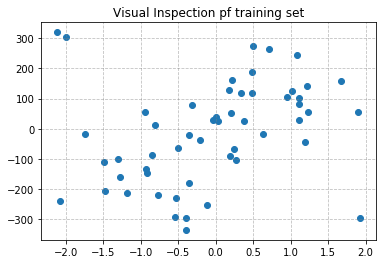

In [21]:
plt.scatter(outliers_train.X, outliers_train.Y)
plt.grid(b = True, color = 'grey', alpha = .5, linestyle = '--')
plt.title("Visual Inspection pf training set")
plt.show()

*What does a visual inspection of training set tell you about the existence of outliers in the data?*
  
    It can tell if there are outliers and if there is some kind of pattern or behaviour. It can also tell if their position.  

**5.2**

In [22]:
## Code here
OutlierOLSModel = OLS(outliers_train['Y'], outliers_train[['X']])
OutlierOLSModel = OutlierOLSModel.fit()

**5.3**

*You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure ahead of time of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?*
  
    If n = len(outlier_train_set), I will have to calculate $n$ chooses $3$ Linear Regressions. In this case, n = 53, so
 
$$ {53 \choose 3} = \frac{53!}{50!\cdot 3!} = \frac{53\cdot52\cdot51}{6} = 23426$$ 

**5.4**

In [23]:
## Code here
def find_outliers_simple(dataset_x, dataset_y):   

    model = OLS(np.array(dataset_y), np.array(dataset_x))
    model = model.fit()
    residuals = abs(model.resid)
    
    # gets the 3 biggest absolute errors. Yes, it is really simple!
    index = np.argpartition(residuals, -3)[-3:]

    return index

index = find_outliers_simple(outliers_train[['X']], outliers_train['Y'])
train_no_outliers = outliers_train.drop(labels = index, axis = 'index')
OutlierFreeSimpleModel = OLS(train_no_outliers['Y'], train_no_outliers[['X']])
OutlierFreeSimpleModel = OutlierFreeSimpleModel.fit()

**5.5**

Visually the second plot withou outliers is better!! As I expected

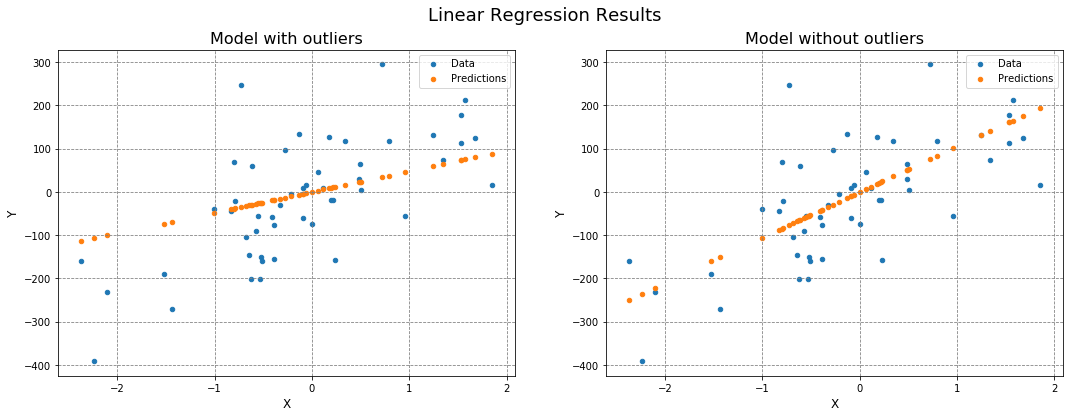

In [24]:
## Code for your plot here

fig, ax = plt.subplots(1,2, figsize = (18, 6))
fig.suptitle("Linear Regression Results", fontsize = 18)

s = 20 #point size


predict_test_outliers = OutlierOLSModel.predict(outliers_test[['X']])
predict_test_free_outliers = OutlierFreeSimpleModel.predict(outliers_test[['X']])

ax[0].scatter(outliers_test[['X']], outliers_test['Y'], label = 'Data', s = s)
ax[0].scatter(outliers_test[['X']], predict_test_outliers, label = 'Predictions', s = s)
ax[1].scatter(outliers_test[['X']], outliers_test['Y'], label = 'Data', s = s)
ax[1].scatter(outliers_test[['X']], predict_test_free_outliers, label = 'Predictions', s = s)

ax[0].legend()
ax[1].legend()

ax[0].set_title("Model with outliers", fontsize = 16)
ax[1].set_title("Model without outliers", fontsize = 16)
ax[0].set_xlabel("X", fontsize = 12)
ax[1].set_xlabel("X", fontsize = 12)
ax[0].set_ylabel("Y", fontsize = 12)
ax[1].set_ylabel("Y", fontsize = 12)
ax[0].grid(b = True, linestyle = '--', color = 'grey', which = 'major')
ax[1].grid(b = True, linestyle = '--', color = 'grey', which = 'major')

plt.show()

**5.6**

In [25]:
## Code here
print("R^2 Score for Linear Regression (Outliers):", r2_score(outliers_test['Y'], OutlierOLSModel.predict(outliers_test[['X']])))
print("R^2 Score for Linear Regression (Free Outliers) :", r2_score(outliers_test['Y'], OutlierFreeSimpleModel.predict(outliers_test[['X']])))
print("The second model (without outliers) seems better!!")

R^2 Score for Linear Regression (Outliers): 0.3361571926486233
R^2 Score for Linear Regression (Free Outliers) : 0.4579491642913984
The second model (without outliers) seems better!!


**5.7**

In [26]:
## Code here
def find_outliers_general(dataset_x, dataset_y, thresh = 2.5):

    model = OLS(np.array(dataset_y), np.array(dataset_x))
    model = model.fit()
    residuals = model.resid

    test = (residuals - np.mean(residuals))/np.std(residuals)

    index = np.argwhere(abs(test) >= thresh)
    return [i[0] for i in index]

index = find_outliers_general(outliers_train[['X']], outliers_train['Y'])
train_no_outliers = outliers_train.drop(labels = index, axis = 'index')
OutlierFreeGeneralModel = OLS(train_no_outliers['Y'], train_no_outliers[['X']])
OutlierFreeGeneralModel = OutlierFreeGeneralModel.fit()

**5.8**

In [27]:
print("R^2 Score for Linear Regression (Free Outliers) :", r2_score(outliers_test['Y'], OutlierFreeSimpleModel.predict(outliers_test[['X']])))
print("R^2 Score for Linear Regression (Free Outliers) :", r2_score(outliers_test['Y'], OutlierFreeGeneralModel.predict(outliers_test[['X']])))

R^2 Score for Linear Regression (Free Outliers) : 0.4579491642913984
R^2 Score for Linear Regression (Free Outliers) : 0.45134919961096254


1. *What outliers does it identify?*
    
        It identified two outliers (51 an 52).
    
2. *How do those outliers compare to the outliers you found in 5.4?*
    
        They ware found in 5.4, but in 5.4 I found 50 too. 
    
3. *How does the general outlier-free Linear Regression model you created in 5.7 perform compared to the simple one in 5.4?*

        It performed worse, cause I don't iddentificate the same outliers. But not so much worse! So, we would have to do an analysis in the specific area of study.
    

---- 
